<a href="https://colab.research.google.com/github/Silverz21/Ajuste-de-Parametros/blob/main/proyecto_rn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Elegir un problema y diseñar y entrenar una red neuronal con keras.

En mi caso elegí la de $\textbf{detectar fraudes en movimientos bancarios}$, cuya base de datos viene de está página: [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).

Primero importamos las librerias que vamos a utilizar (las mas importantes son las librerias keras que son las que pide la tarea).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
warnings.filterwarnings('ignore') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importamos la base de datos (por mi parte esta guardada en mi Google Drive).

In [ ]:
path = "/content/drive/MyDrive/creditcard.csv"
df = pd.read_csv(path)
df.dropna(inplace=True)
display(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Verificamos la distribución de las clases, cuantos fraudes hay en total de la base de datos.

In [ ]:
a, b = df['Class'].value_counts()
print("Fraudes en la base de datos:", b)
print("Transacciones Validas:",a)
print("Porcentaje de Fraudes:",round(b/len(df) * 100, 3),"%")

Fraudes en la base de datos: 492
Transacciones Validas: 284315
Porcentaje de Fraudes: 0.173 %


Y graficamos la distribución de dichas clases para tener una idea visual de los datos.

Observamos que los datos están muy desbalanceados.

<Axes: ylabel=' '>

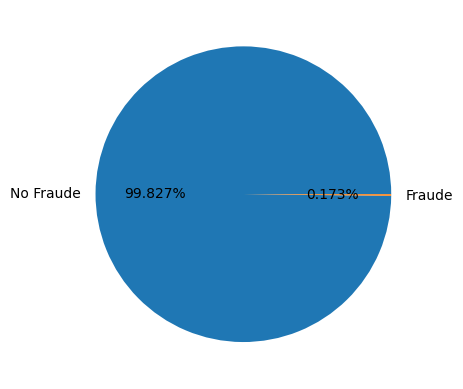

In [ ]:
data = df.copy()
data[" "] = np.where(df["Class"] == 1 ,  "Fraude", "No Fraude")
data[" "].value_counts().plot(kind="pie", autopct='%.3f%%')

Presentamos la distribución del tiempo y los gastos promedios como extra.

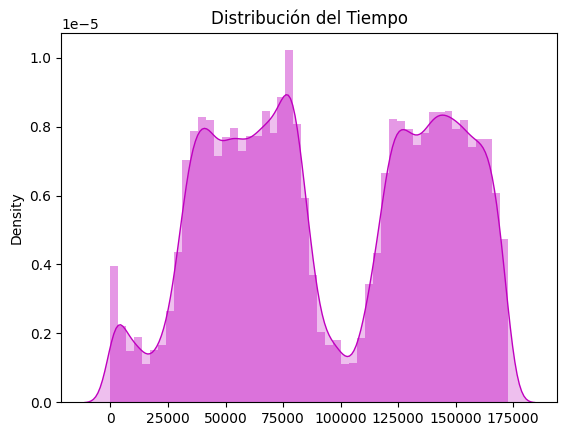

In [ ]:
time_value = df['Time'].values 

sns.distplot(time_value, hist=True, color="m", kde_kws={"shade": True}).set_title('Distribución del Tiempo')
plt.show()

In [ ]:
print("Promedio de Gastos (Fraude): " + str(df[df["Class"] == 1]["Amount"].mean()))
print("Promedio de Gastos (Transacción Valida): " + str(df[df["Class"] == 0]["Amount"].mean()))

Promedio de Gastos (Fraude): 122.21132113821139
Promedio de Gastos (Transacción Valida): 88.29102242231328


Como los datos están muy desbalanceados crearemos un nuevo DataFrame que contenga el mismo número de fraudes y no fraudes (el número estará dado por el número total de fraudes del DataFrame original que es $492$).

Del $DF$ original creamos uno donde quitaremos las columnas de tiempo y la cantidad de dinero (en esta red neuronal dichos datos no son relevantes para el entrenamiento).

In [ ]:
datos = df.drop([ "Time", "Amount"], axis=1)
display(datos)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


Ahora crearemos otro $DF$ que solo incluya filas que en la columna de $"Class"$ sean fraude (tengan valor $1$).

In [ ]:
fraude = datos.loc[datos["Class"]==1]
display(fraude)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1


Creamos otro $DF$ que solo incluya filas que en la columna de $"Class"$ sean no fraude (tengan valor $0$).

In [ ]:
no_fraude = datos.loc[datos["Class"]==0]
display(no_fraude)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


Y del $DF$ anterior elegimos aleatoriamente $492$ datos (que es la cantidad de fraudes en la base de datos).

In [ ]:
no_fraude = no_fraude.sample(n=len(fraude))
no_fraude

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
50356,0.638047,-1.246874,-0.314736,-0.264836,-0.031902,1.266928,-0.033675,0.308927,-1.625736,0.589107,...,-0.045994,-0.403602,-1.210534,0.097523,-1.033980,-0.251935,0.220138,-0.018670,0.037997,0
283953,-1.974668,0.516548,0.211706,-3.248689,-0.632593,-0.789940,0.004344,0.532752,1.794379,-1.715304,...,-0.416821,0.339733,0.959670,-0.456335,0.782975,0.181788,-0.324612,-0.543646,-0.182284,0
16033,1.178731,-0.225835,0.648331,-0.165576,-0.772182,-0.378800,-0.478785,0.187545,0.332925,-0.047323,...,-0.180288,-0.056660,-0.226102,0.155073,0.247979,-0.061137,0.908600,-0.067412,-0.004839,0
60128,-0.515243,-0.105593,2.156667,-0.656156,-0.928253,-0.412850,-0.374987,0.162611,-1.217604,0.342712,...,0.222634,0.457773,1.130160,-0.229869,0.415111,0.186250,0.163401,0.076979,0.074797,0
102181,-4.199895,4.302425,-2.179205,0.279493,-1.214953,5.606204,-10.449138,-23.047073,-2.331518,-4.855992,...,5.719421,-11.348960,3.673631,1.569203,-1.433672,0.323773,0.399653,-0.213067,0.515124,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160370,2.070807,0.610986,-3.079827,0.594150,1.119838,-1.588948,0.663373,-0.483305,0.134498,-1.229418,...,-0.007208,-0.147844,-0.272618,-0.083462,-0.855739,0.193939,0.732556,-0.064105,-0.003144,0
168691,2.099598,-0.929599,-2.131790,-0.854303,-0.004386,-0.968272,0.154301,-0.479904,-0.564345,0.754455,...,0.158806,0.233437,0.597184,-0.185325,-0.705343,0.418216,0.042368,-0.073122,-0.067359,0
215705,-1.778866,-2.630909,-0.162263,-0.905025,-0.693729,0.808696,2.386610,-1.007339,-0.285506,0.103050,...,0.130881,-0.351949,-0.094951,-0.064063,-0.880709,-0.151423,-0.277071,0.260784,-0.565981,0
161374,-1.368485,1.569336,2.230188,3.073143,0.312403,0.653631,0.020208,0.616172,-1.785565,0.379507,...,-0.108060,0.298870,0.697188,-0.437083,1.179577,0.554758,0.204196,-0.170340,-0.031070,0


Ahora concatenamos ambos data frame del mismo tamaño ($492$).

In [ ]:
new_df = pd.concat([fraude, no_fraude], axis=0)
new_df = new_df.sort_index()
new_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
12,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,1.323729,...,-0.102756,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,0
44,-0.762256,0.127768,2.650056,-1.875663,-0.893356,-0.268715,-0.419864,0.146233,-0.869635,-0.038652,...,0.359393,0.433350,1.260403,-0.404700,0.094946,0.480976,-0.090685,0.319223,0.135600,0
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1
1558,-2.574077,0.798899,-0.694405,-2.299404,-0.224491,-1.567267,-0.005168,0.608422,0.724049,-0.527352,...,0.023132,0.023633,0.262818,-0.627974,0.086909,-0.077949,-0.211590,-0.261825,-0.533791,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284037,0.012351,0.878702,0.466900,-0.497896,0.236261,-1.275689,1.006234,-0.208716,-0.075464,-0.419531,...,-0.062228,-0.228663,-0.470537,0.123031,0.393760,-0.559910,0.117828,0.251626,0.100854,0
284039,-0.347837,0.989816,-0.127569,-0.531810,0.072949,-1.162303,0.635664,0.253214,-0.129520,-0.627971,...,-0.136794,-0.216112,-0.642998,0.154669,-0.047817,-0.469988,0.145416,0.114564,0.026048,0
284446,-0.247996,-0.099406,0.039662,-2.886759,0.789749,-1.513918,0.652431,-0.086283,0.818483,-1.526630,...,-0.177983,-0.169684,-0.638662,-0.063553,-0.387545,0.143494,-0.598657,-0.076077,-0.066322,0
284559,-1.047190,1.060262,2.157606,0.474470,-0.151068,-0.114431,0.951265,-0.009540,0.160306,-0.837337,...,-0.245947,-0.473306,-1.257094,-0.150043,0.317414,0.380831,-1.029330,-0.157094,0.051943,0


Y observamos que nuestra nueva base de datos tiene mitad datos de Fraude y No Fraude.

<Axes: ylabel=' '>

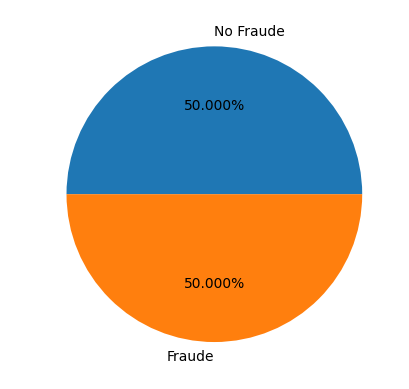

In [ ]:
new_data = new_df.copy()
new_data[" "] = np.where(new_df["Class"] == 1 ,  "Fraude", "No Fraude")
new_data[" "].value_counts().plot(kind="pie", autopct='%.3f%%')

Ahora creamos dos variables, una donde tenga los datos $V_1, ..., V_{28}$ y otro donde tenga las clases (si son fraudes o no).

In [ ]:
X = new_df.drop(['Class'], axis=1)
y = new_df['Class']

De estas nuevas variables las separamos en datos de entrenamiento y datos de prueba (en este caso el $90\%$ de los datos los ocuparemos para entrenar la red neuronal).

In [ ]:
X_ent, X_pr, y_ent, y_pr = train_test_split(X, y, train_size=0.90)

Creamos el modelo con entrada de 32 neuronas, 16 en una sola capa oculta y una salida de 1 sola neurona (que nos clasifica si es o no fraude).

In [ ]:
modelo = keras.Sequential([
    keras.layers.Dense(32, activation='tanh', input_shape=(X_ent.shape[1],)),
    keras.layers.Dense(16, activation='tanh'),
    keras.layers.Dense(1, activation='sigmoid')
])
modelo.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

Realizamos saltos de 32 en 32 datos y damos 10 vuelta a los datos.

In [ ]:
history = modelo.fit(
    X_ent, y_ent, 
    validation_data=(X_pr, y_pr),
    batch_size=32, 
    epochs=10, 
)

Epoch 1/10
28/28 [==============================] - 1s 13ms/step - loss: 0.4996 - accuracy: 0.7390 - val_loss: 0.4080 - val_accuracy: 0.8485
Epoch 2/10
28/28 [==============================] - 0s 5ms/step - loss: 0.3708 - accuracy: 0.8497 - val_loss: 0.3398 - val_accuracy: 0.8788
Epoch 3/10
28/28 [==============================] - 0s 5ms/step - loss: 0.3007 - accuracy: 0.8893 - val_loss: 0.2827 - val_accuracy: 0.8788
Epoch 4/10
28/28 [==============================] - 0s 4ms/step - loss: 0.2473 - accuracy: 0.9141 - val_loss: 0.2396 - val_accuracy: 0.9091
Epoch 5/10
28/28 [==============================] - 0s 5ms/step - loss: 0.2084 - accuracy: 0.9356 - val_loss: 0.2053 - val_accuracy: 0.9394
Epoch 6/10
28/28 [==============================] - 0s 5ms/step - loss: 0.1805 - accuracy: 0.9424 - val_loss: 0.1833 - val_accuracy: 0.9495
Epoch 7/10
28/28 [==============================] - 0s 5ms/step - loss: 0.1617 - accuracy: 0.9458 - val_loss: 0.1671 - val_accuracy: 0.9495
Epoch 8/10
28/28 [=

Observamos que con pocas vueltas nuestra red neuronal llega aproximadamente a un $97\%$ de precisión para detectar si es o no un fraude.

Observamos como se ven visualmente las iteraciones en las vuelta de datos.

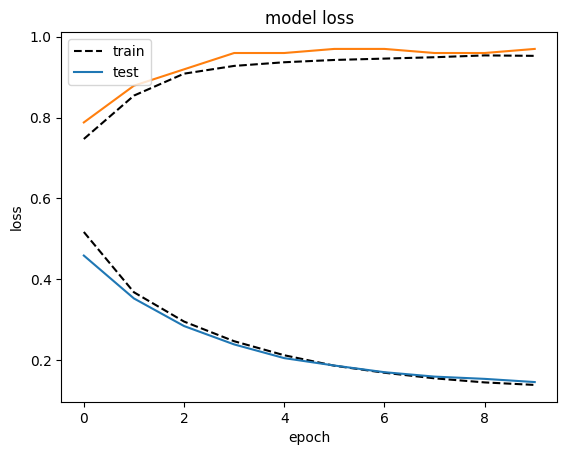

In [ ]:
plt.plot(history.history['loss'], linestyle="--", color="black")
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'], linestyle="--", color="black")
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test', ], loc='upper left')
plt.show()